In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
file_dir = "data/House/"

In [3]:
df = pd.read_csv(file_dir+'train.csv')

In [4]:
dfTemp = pd.read_csv(file_dir+'train.csv')

In [5]:
pd.set_option('display.max_columns', 500)

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df.drop(['Id','Street','Alley','Utilities','PoolArea','Fence','LotConfig','ScreenPorch','3SsnPorch','Condition1','Condition2','OpenPorchSF','EnclosedPorch','WoodDeckSF','GarageCond','GarageQual','GarageArea','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','ExterCond','ExterQual','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','Functional','FireplaceQu','GarageYrBlt','GarageFinish','MiscFeature','MiscVal','MSSubClass','LotFrontage','LandSlope','RoofStyle','RoofMatl','PavedDrive','LotShape'], axis=1, inplace=True)

In [8]:
df.columns

Index(['MSZoning', 'LotArea', 'LandContour', 'Neighborhood', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'CentralAir', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageCars', 'PoolQC', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [9]:
timeDF = df[['YrSold','MoSold','SalePrice']]

In [10]:
yearSold=np.array(timeDF["YrSold"])
print(yearSold)

[2008 2007 2008 ... 2010 2010 2008]


In [11]:
year=np.unique(yearSold).tolist()
year

[2006, 2007, 2008, 2009, 2010]

In [12]:
from pandas import DataFrame
from datetime import datetime

In [13]:
DF2006 = timeDF.loc[timeDF['YrSold'] == 2006]

In [14]:
DF2006 = DF2006.sort_values(by=['MoSold'])

In [15]:
timeDF = timeDF.sort_values(by=['YrSold'])

In [16]:
for i in year:
    print(i)
    globals()['DF%s' %i] = timeDF.loc[timeDF['YrSold'] == i]

2006
2007
2008
2009
2010


In [17]:
timeDF['Day'] = 1

In [18]:
timeDF = timeDF.rename(index=str, columns={"YrSold": "year", "MoSold": "month", "Day":"day"})

In [19]:
timeDF['Date'] = pd.to_datetime(timeDF[['year', 'month', 'day']])

In [20]:
timeDF.drop(['year','month','day'], axis=1, inplace=True)

In [21]:
timeDF = timeDF.sort_values(by=['Date'])

In [22]:
timeDF.head(10)

,SalePrice,Date
664,423000,2006-01-01
370,172400,2006-01-01
169,228000,2006-01-01
996,136500,2006-01-01
1404,105000,2006-01-01
302,205000,2006-01-01
1040,155000,2006-01-01
411,145000,2006-01-01
810,181000,2006-01-01
141,260000,2006-01-01


In [23]:
from matplotlib.pyplot import figure

In [24]:
timeDF.dtypes

SalePrice             int64
Date         datetime64[ns]
dtype: object

In [25]:
X = timeDF['Date']
Y = timeDF['SalePrice']

/opt/Anaconda/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


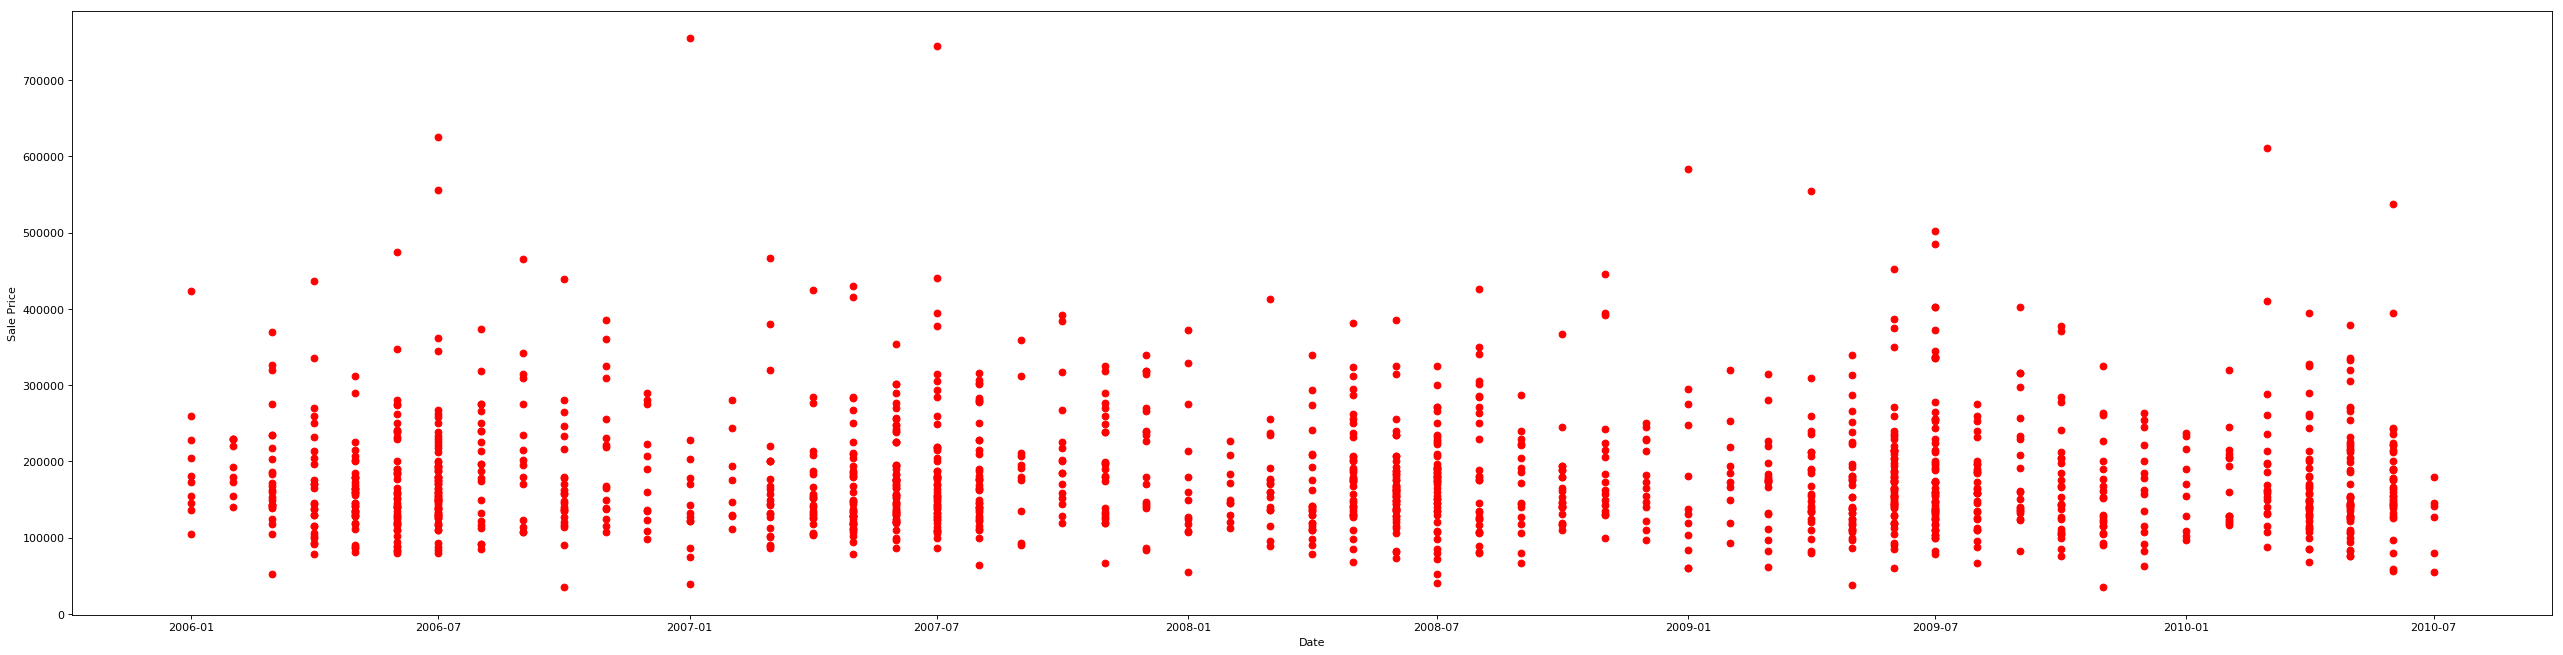

In [26]:
plt.figure(num=None, figsize=(40,10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X,Y,c="red")
plt.xlabel("Date")
plt.ylabel("Sale Price");
plt.show()

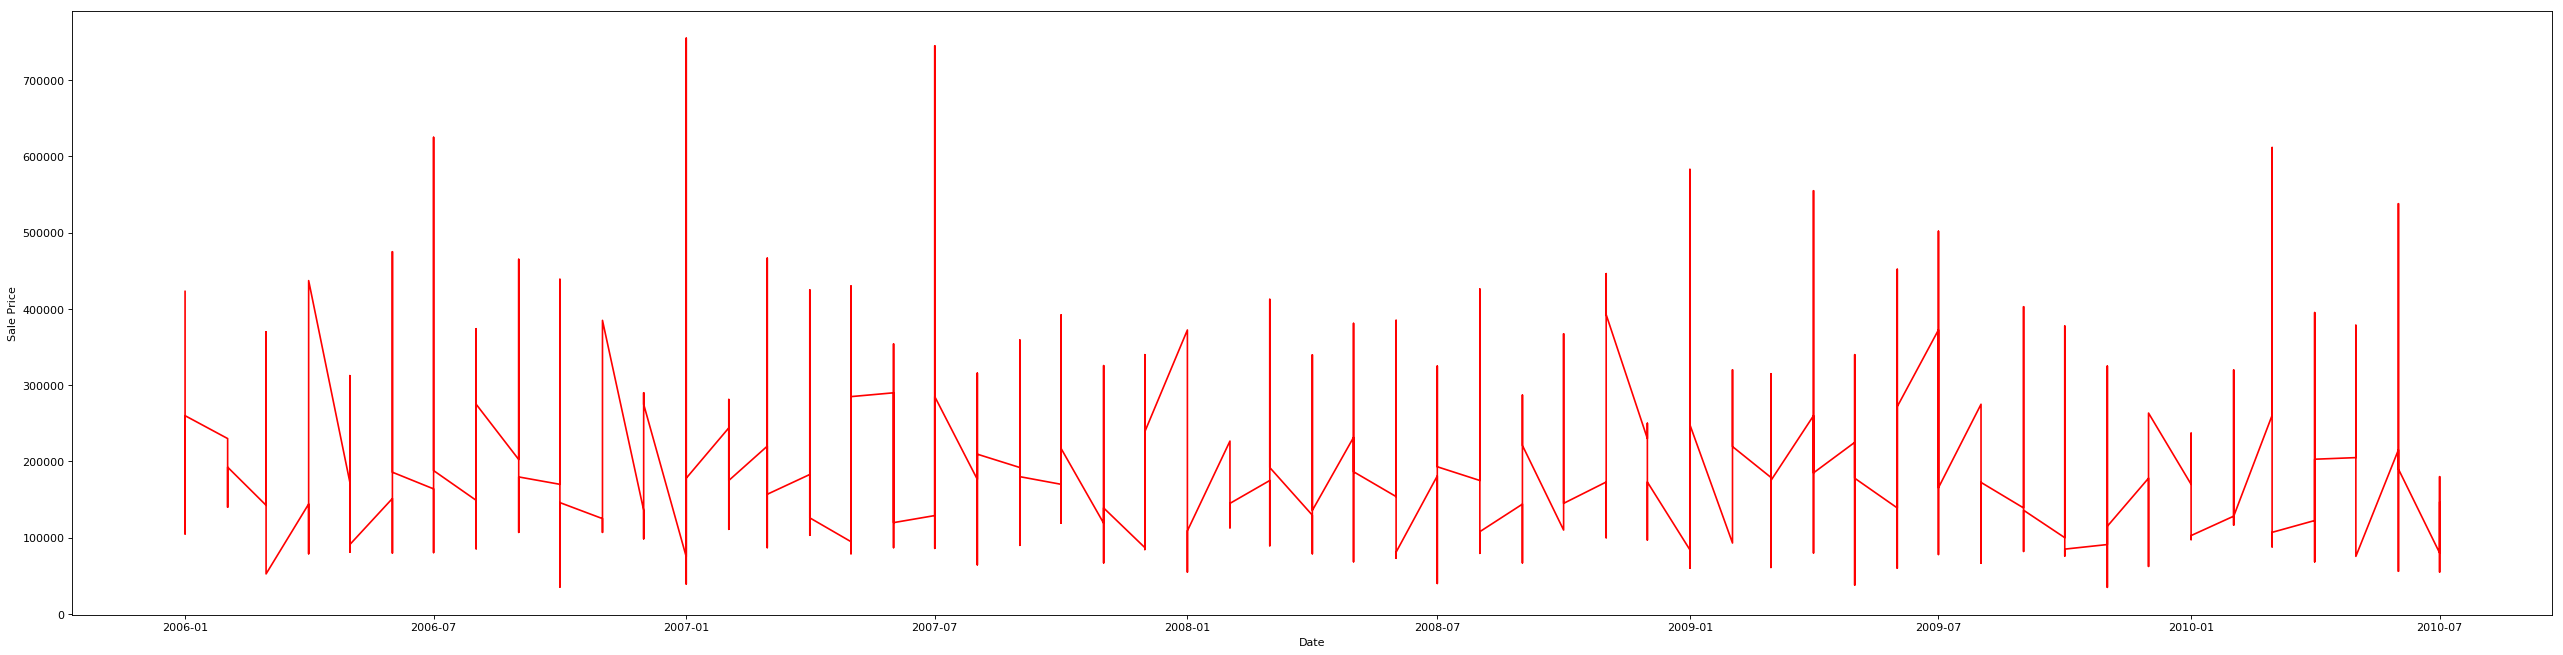

In [27]:
plt.figure(num=None, figsize=(40,10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(X,Y,c="red")
plt.xlabel("Date")
plt.ylabel("Sale Price");
plt.show()

# Boxplot 2006

In [28]:
DF2006 = DF2006.drop(columns=['YrSold'])
summary = DF2006.describe()
summary = summary.transpose()
summary.head()

,count,mean,std,min,25%,50%,75%,max
MoSold,314.0,6.487261,2.651450,1.0,5.0,6.5,8.0,12.0
SalePrice,314.0,182549.458599,79426.838855,35311.0,131375.0,163995.0,218782.5,625000.0


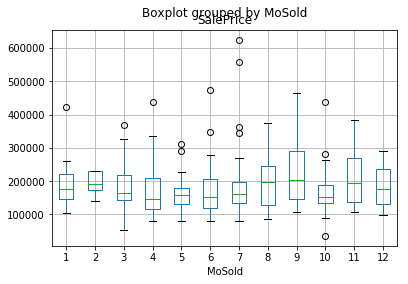

In [29]:
DF2006.boxplot(by ='MoSold', column =['SalePrice'], grid=True) 

# Boxplot 2007

In [30]:
DF2007 = DF2007.drop(columns=['YrSold'])
summary = DF2007.describe()
summary = summary.transpose()
summary.head()

,count,mean,std,min,25%,50%,75%,max
MoSold,329.0,6.610942,2.753158,1.0,5.0,6.0,8.0,12.0
SalePrice,329.0,186063.151976,85768.171410,39300.0,129900.0,167000.0,219500.0,755000.0


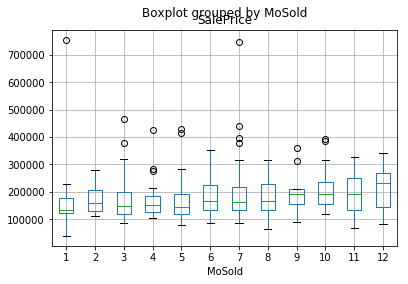

In [31]:
DF2007.boxplot(by ='MoSold', column =['SalePrice'], grid=True) 

# Boxplot 2008

In [32]:
DF2008 = DF2008.drop(columns=['YrSold'])
summary = DF2008.describe()
summary = summary.transpose()
summary.head()

,count,mean,std,min,25%,50%,75%,max
MoSold,304.0,6.546053,2.753549,1.0,5.0,6.0,8.0,12.0
SalePrice,304.0,177360.838816,69735.610685,40000.0,131250.0,164000.0,207000.0,446261.0


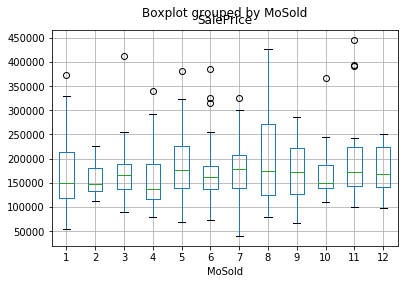

In [33]:
DF2008.boxplot(by ='MoSold', column =['SalePrice'], grid=True) 

# Boxplot 2009

In [34]:
DF2009 = DF2009.drop(columns=['YrSold'])
summary = DF2009.describe()
summary = summary.transpose()
summary.head()

,count,mean,std,min,25%,50%,75%,max
MoSold,338.0,6.718935,2.712920,1.0,5.0,7.0,8.0,12.0
SalePrice,338.0,179432.103550,80879.237311,34900.0,125250.0,162000.0,212750.0,582933.0


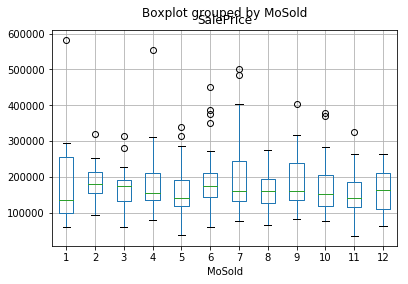

In [35]:
DF2009.boxplot(by ='MoSold', column =['SalePrice'], grid=True) 

# Boxplot 2010

In [36]:
DF2010 = DF2010.drop(columns=['YrSold'])
summary = DF2010.describe()
summary = summary.transpose()
summary.head()

,count,mean,std,min,25%,50%,75%,max
MoSold,175.0,4.325714,1.513226,1.0,3.0,5.0,5.0,7.0
SalePrice,175.0,177393.674286,80451.280085,55000.0,128100.0,155000.0,213250.0,611657.0


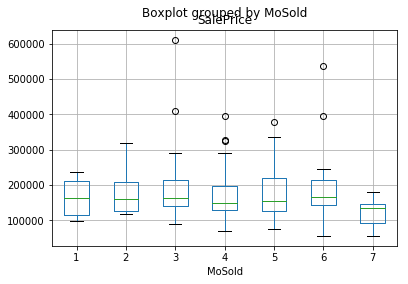

In [37]:
DF2010.boxplot(by ='MoSold', column =['SalePrice'], grid=True) 